In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns; sns.set()

In [2]:
import sklearn
from sklearn.manifold import TSNE

In [17]:
n_samples = 1600
n_features = 5 # 1024
centers = 40
#cluster_std = [0.1 + (i * 0.7) / centers for i in range(centers)]
# cluster_std = [0.05 + (i * 0.1) / centers for i in range(centers)]
cluster_std = [0.02 + (i * 0.05) / centers for i in range(centers)]

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=2, cluster_std=cluster_std, center_box=(-1., 1.))

In [18]:
RS = 48154140
digits_proj = TSNE(n_components=2, random_state=RS).fit_transform(X)

In [19]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", centers))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=10,
                    c=palette[(colors.astype(np.int))])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(centers):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [20]:
y

array([22, 38,  9, ..., 29, 20,  9])

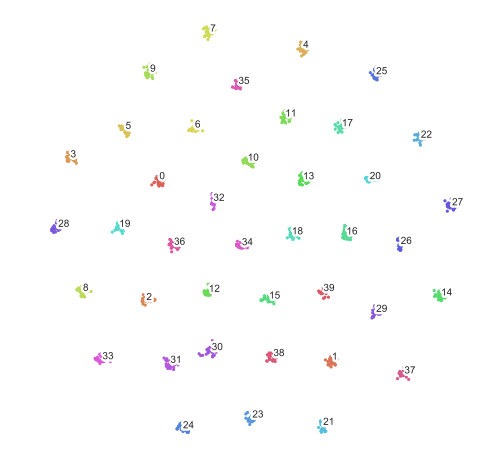

In [21]:
f, ax, sc, txts = scatter(digits_proj, y)

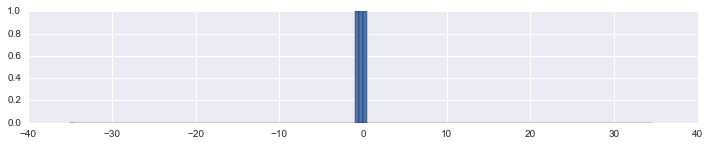

In [8]:
bins = np.arange(-35, 35, 0.5)
plt.figure(figsize=(12, 2))
plt.hist(X[150], bins=bins)
plt.show()

In [11]:
X[150]

array([-0.90771939,  0.32109115, -0.27617137])

In [10]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets.samples_generator:

make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points equally divided among clusters.
    
    n_features : int, optional (default=2)
        The number of features for each sample.
    
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    
    cluster_std : float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    
    center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers a